## Lab08_KNN_02

### Disciplina Inteligência Artificial

### Prof: José Humberto Cruvinel

### Nome dos alunos:

* Sérgio Wilson Rosa Brito
* Charles Rodrigues Magalhães
* Julio Luiz dos Reis Filho

Este jupyter notebook deve ser executado no Google Colab (https://colab.research.google.com/)

# Exercício 8.2 - Utilizando KNN no dataset wine

Adicione novas linhas abaixo para resolver esse exercício.

Aplique o KNN para o dataset wine utilizado no exercício 02 de regressão logística (Lab07_Regressao_Logistica_02.ipynb). Utilize GridSearchCV para obter o melhor estimador KNN possível, variando os parâmetros abaixo:

```
parameters = {
        'n_neighbors':   range(100),
        'weights'    :   ['uniform', 'distance'],
        'algorithm'  :   ['auto', 'ball_tree', 'kd_tree', 'brute']
             }

```

Ao final, crie uma planilha comparando os resultados obtidos do melhor estimador com os da regressão logística do Lab07.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

wine = load_wine()
df = pd.DataFrame(wine.data)
df.columns = wine.feature_names
df['target'] = wine.target

X = df.drop(['target'], axis=1)
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split (X , y, stratify = y,test_size = 0.3,random_state = 1111)

In [ ]:
!pip install scikit-plot

Fitting 10 folds for each of 65600 candidates, totalling 656000 fits
---MÉTRICAS DE DESEMPENHO---
Accuracy:     [ 0.963  0.963  1.000]
Precision:    [ 0.900  1.000  1.000]
Recall:       [ 1.000  0.905  1.000]
Specificity:  [ 1.000  0.943  1.000]
Sensitivity:  [ 1.000  0.905  1.000]
---REPORT---
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.90      0.95        21
           2       1.00      1.00      1.00        15

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54

---MEDIDAS DE DESEMPENHO---
Accuracy: 0.9629629629629629
Precision: 0.9666666666666667
Recall: 0.9629629629629629
F1 Score: 0.9630116959064329
ROC AUC: 0.9970137886804554
Best KNN Model Parameters:
{'cv': 10, 'error_score': nan, 'estimator__algorithm': 'auto', 'estimator__leaf_size': 30, 'estimator__metric': 'minkowski', 

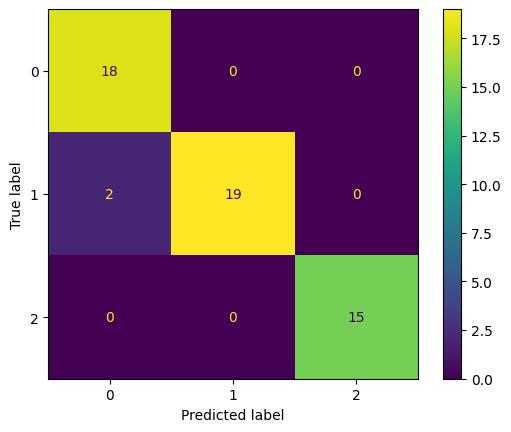

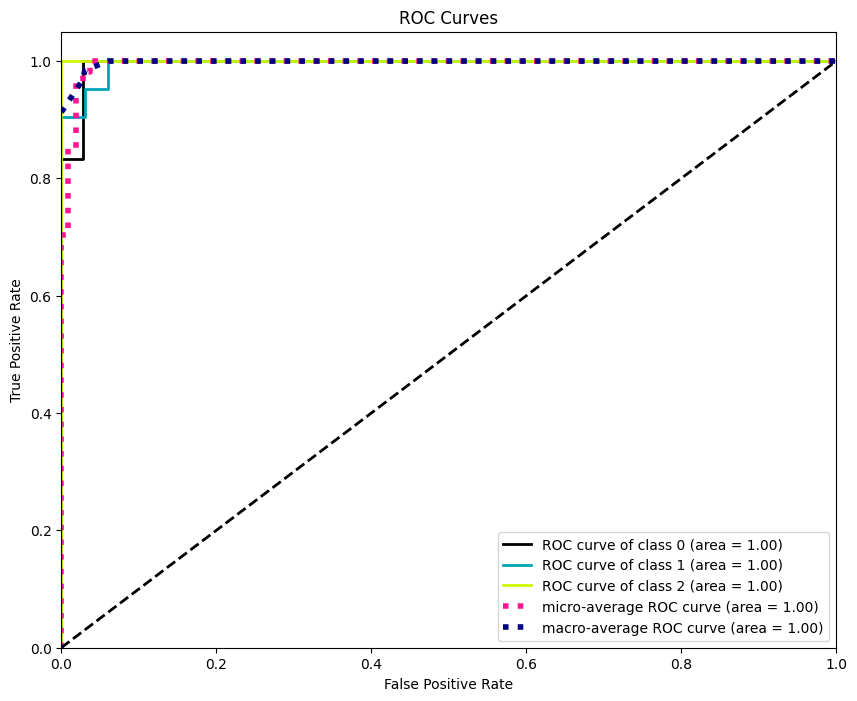

In [ ]:
# Logistic Regression - Wine Model With KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from scikitplot.metrics import plot_roc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    param_grid_lr = {
      'n_neighbors': range(1, 101),
      'weights': ['uniform', 'distance'],
      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
      'leaf_size': range(10, 51),
      'p': [1, 2],
    }

    log_reg = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
    log_reg = Pipeline([('scale', MinMaxScaler()), ('knn', log_reg)])
    log_reg.fit(X_train, y_train)

    # Prevendo valores para X_test
    y_pred = log_reg.predict(X_test)

    # Imprimindo a matriz de confusão
    cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
    disp.plot()

    # Calculando as métricas
    print("---MÉTRICAS DE DESEMPENHO---")
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
    print("Accuracy:    ", (tp + tn) / (tp + tn + fp + fn))
    print("Precision:   ", tp / (tp + fp))
    print("Recall:      ", tp / (tp + fn))
    print("Specificity: ", tn / (tn + fn))
    print("Sensitivity: ", tp / (tp + fn))

    # Medidas de desempenho
    print("---REPORT---")
    print(classification_report(y_test, y_pred))
    print("---MEDIDAS DE DESEMPENHO---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test),multi_class='ovr'))

    best_knn_params = log_reg.named_steps['knn'].get_params()
    print('Best KNN Model Parameters:')
    print(best_knn_params)

    # Plotando a curva ROC para os dados de teste
    y_probas = log_reg.predict_proba(X_test)
    plot_roc(y_test, y_probas, figsize=(10, 8))
    plt.show()





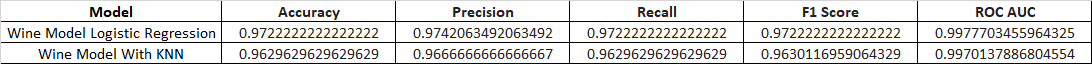